# Boston Housing Price Prediction using Neural Network 

In [1]:
# pip install tensorflow

In [2]:
#pip install --upgrade numexpr

In [3]:
#pip install --upgrade bottleneck

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
data = pd.read_csv('E:/CV and Cover Letter/Data Analyst job/python challenges/Boston/boston.csv')

In [6]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Remove unnecessary feature

In [7]:
data = data.drop('Unnamed: 0', axis=1)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

In [10]:
print('Boston Housing dataset contains ' f'{data.shape[0]} of records/rows and {data.shape[1]} of features/columns')

Boston Housing dataset contains 506 of records/rows and 14 of features/columns


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Presents descriptive statistic analysis

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Generate Dataset and group them into input and target


In [13]:
X = data.drop(columns=['PRICE']) # Independent variables / features
y = data['PRICE'] # Dependent variable / target

In [14]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

### Preprocess data by normalize the features values with StandarScaler

In [15]:
scaler = StandardScaler()  
# fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

### Build the Neural Network Model

In [16]:
# input_dim = 13, means the input data have 13 columns/features
input_dim=X_train.shape[1]
input_dim


13

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_dim=13),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),    
    Dense(1,  activation='linear') # Single output for the house price
])


C:\Users\sophia\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Train the model

In [19]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 628.3417 - mae: 23.1266 - val_loss: 496.4269 - val_mae: 20.6016
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 548.7177 - mae: 21.2044 - val_loss: 399.6595 - val_mae: 18.0294
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 400.1314 - mae: 17.4271 - val_loss: 250.1351 - val_mae: 13.6679
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 229.6191 - mae: 12.6421 - val_loss: 93.4686 - val_mae: 7.3157
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 110.1253 - mae: 8.2496 - val_loss: 51.3245 - val_mae: 5.3137
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 76.3368 - mae: 6.7851 - val_loss: 35.0560 - val_mae: 4.2329
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 38.6590 - mae: 4.6005 - val_loss: 30.7700 - val_mae: 4.0234
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28.2767 - mae: 3.9862 - val_loss: 28.0459 - val_mae: 3.8798
Epoch 9/1000
11/1

### Evaluate Model

In [20]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")

Mean Absolute Error on Test Data: 2.77


### Plotting the Loss and Accuracy

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

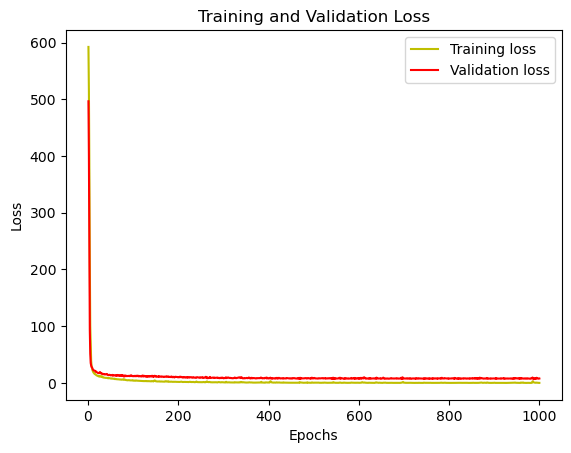

In [22]:
plt.plot(epochs, loss, 'y', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [23]:
accuracy = history.history['mae']
val_accuracy = history.history['val_mae']

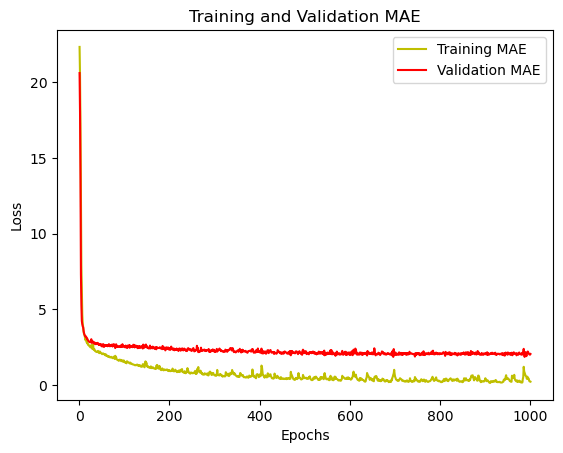

In [24]:
plt.plot(epochs, accuracy, 'y', label ='Training MAE')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

### Predict on test data

In [25]:
predict = model.predict(X_test[:7])
print('Prediction values:' , predict)
print('Actual values:', y_test[:7])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction values: [[28.913567]
 [35.687565]
 [14.549002]
 [24.835684]
 [17.819675]
 [20.21671 ]
 [19.79302 ]]
Actual values: 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
Name: PRICE, dtype: float64


In [31]:
for i, (predict, y_test) in enumerate(zip(predict, y_test), 1):
    print(f"Sample {i}: Prediction = {predict}, Actual = {y_test}")

Sample 1: Prediction = [28.913567], Actual = 23.6
Sample 2: Prediction = [35.687565], Actual = 32.4
Sample 3: Prediction = [14.549002], Actual = 13.6
Sample 4: Prediction = [24.835684], Actual = 22.8
Sample 5: Prediction = [17.819675], Actual = 16.1
Sample 6: Prediction = [20.21671], Actual = 20.0
Sample 7: Prediction = [19.79302], Actual = 17.8


### Compare with other evaluation method

In [26]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.4410 - mae: 2.6418


In [27]:
print('Mean Squared error with Neural Network:', mse_nn)

Mean Squared error with Neural Network: 15.178557395935059


In [28]:
print('Mean Absolute error with Neural Network:', mae_nn)

Mean Absolute error with Neural Network: 2.7713608741760254


### SAve the model

model.save('model.h5')